# Tutorial

GLHMM is a Python toolbox designed for neuroscience applications, specifically focusing on Hidden Markov Models ([HMM](<../../docs/glossary.md#HMM>)).

GLHMM supports multiple data modalities, including fMRI, EEG, MEG and ECoG, and offers a comprehensive set of HMMs tailored for different data types and analysis goals:

- The `Gaussian` distribution is used in fMRI and other neuroimaging modalities.
- The `Wishart` distribution is employed in fMRI to specifically focus on changes in connectivity (covariance).
- The `Time-delay embedded` distribution is applied to whole-brain electrophysiological data (MEG or EEG), which, based on the Gaussian distribution, can also capture spectral modulations in the data.
- The `Autoregressive` models provide a more detailed spectral description for electrophysiological data with a limited number of channels.
- The `Regression-based decoding` models, such as the temporal unconstrained decoding model, describe the dynamic relationship between brain activity and ongoing stimuli.
- The `Encoding` models emphasize the spatial interpretation of brain activity in relation to stimuli.


## Import modules
We first import the relevant modules. If you have not done so, install the repo using:

In [ ]:
pip install --user git+https://github.com/vidaurre/glhmm

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glhmm.glhmm as glhmm

## Load data
Synthetic data are provided as example in the glhmm/docs/notebooks/example1 folder. The file `data.csv` contains synthetic timeseries. The data should have the shape ((no subjects/sessions * no timepoints), no features), meaning that all subjects and/or sessions have been concatenated along the first dimension. The second dimension is the number of features, e.g., the number of parcels or channels. The file `T.csv` specifies the indices in the concatenated timeseries corresponding to the beginning and end of individual subjects/sessions in the shape (no subjects, 2). In this case, we have generated timeseries for 20 subjects and 50 features. Each subject has 1,000 timepoints. The timeseries has the shape (20000, 50) and the indices have the shape (20, 2).
Data should be in numpy format.

In [8]:
data_tmp = pd.read_csv('example1/data.csv', header=None)
T_t_tmp = pd.read_csv('example1/T.csv', header=None)
data = data_tmp.to_numpy()
T_t = T_t_tmp.to_numpy()

## Initialise and train HMM

Select the model based on your data and the research goals.

> This is an example of a ``Gaussian HMM`` on a single set of timeseries from multiple subjects or sessions. Access the full code here [example1.ipynb](example1/example1.ipynb)

We first initialise the hmm object and specify hyperparameters. In this case, since we do not model an interaction between two sets of variables in the HMM states, we set `model_beta='no'`. We here estimate 4 states. If you want to model a different number of states, change K to a different value. We here model states as Gaussian distributions with mean and full covariance matrix, so that each state is described by a mean amplitude and functional connectivity pattern, specify `covtype='full'`. If you do not want to model the mean, add `model_mean='no'`. 

In [9]:
hmm = glhmm.glhmm(model_beta='no', K=4, covtype='full')

We then train the HMM using the data and indices loaded above. Since we here do not model an interaction between two sets of timeseries but run a "classic" HMM instead, we set `X=None`. Y should be the timeseries in which we want to estimate states (in here called data) and indices should be the beginning and end indices of each subject (here called T_t). If you need to make indices you can use the `auxiliary.make_indices_from_T` function.

Optionally, you can also return `Gamma` (the state probabilities at each timepoint), `Xi` (the joint probabilities of past and future states conditioned on the data) and `FE` (the free energy of each iteration). 

In [ ]:
hmm.train(X=None, Y=data, indices=T_t)

## Inspect model

We then inspect some interesting aspects of the model: the transition probabilities, the state means, and the state covariances.

In [11]:
K = hmm.hyperparameters["K"] # the number of states
q = data.shape[1] # the number of parcels/channels
TP = np.zeros(shape=(K, K))
TP = hmm.P # the transition probability matrix
state_means = np.zeros(shape=(q, K))
state_means = hmm.get_means() # the state means in the shape (no. features, no. states)
state_FC = np.zeros(shape=(q, q, K))
for k in range(K):
    state_FC[:,:,k] = hmm.get_covariance_matrix(k=k) # the state covariance matrices in the shape (no. features, no. features, no. states)

## Plot results 

> For more plotting options, refer to `graphics.py`

Plot transition probability matrix. Note that self-transitions are usually very likely so there should be a strong diagonal pattern

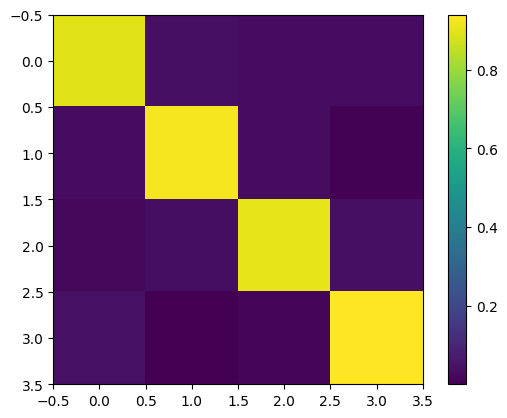

In [12]:
plt.imshow(TP)
plt.colorbar()
plt.show()

Plot state means. This will show the states on the x-axis, each parcel/channel on the y-axis, and the mean activation of each parcel in each state as the color intensity.

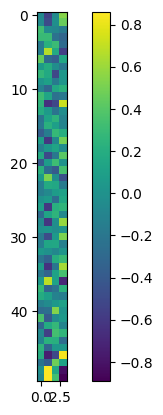

In [13]:
plt.imshow(state_means)
plt.colorbar()
plt.show()

Plot covariance matrix (i.e. FC) of state 1

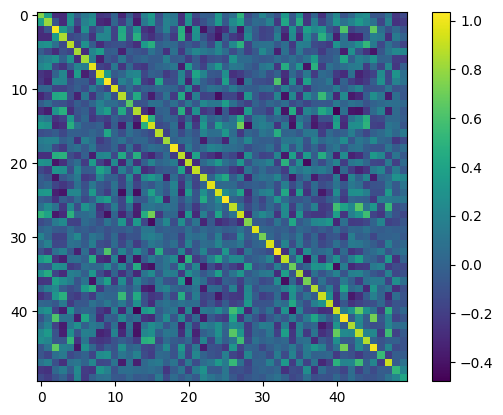

In [14]:
plt.imshow(state_FC[:,:,0])
plt.colorbar()
plt.show()